In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
0.02*black_youth_canada

4764.74

In [12]:
60000*0.23

13800.0

In [7]:
directory=os.getcwd().replace('notebooks','data\\processed\\')
# output_directory=directory.replace('\\output\\census_elections\\','\\processed\\')
main_df=pd.read_csv(f'{directory}main_df.csv')
main_df

,Electoral_District_Number,District_Name_x,Province,2015_Bloc-Québécois_Votes,2015_Conservative_Votes,2015_Green-Party_Votes,2015_Liberal_Votes,2015_NDP-New-Democratic-Party_Votes,2015_Other_Votes,2015_Vote_Total,...,immigrant_age_under_5_years,immigrant_age_5_to_14_years,immigrant_age_15_to_24_years,immigrant_age_25_to_44_years,immigrant_age_45_years_and_over,immigrant_generation_total_-_generation_status_for_the_population_in_private_households_-_25_sample_data,immigrant_generation_first_generation,immigrant_generation_second_generation,immigrant_generation_third_generation_or_more,cluster
0,10001,Avalon,Newfoundland-and-Labrador,0,4670,228,23528,6075,7585,42086,...,150.0,175.0,195.0,410.0,90.0,85330.0,1275.0,2005.0,82040.0,5.0
1,10002,Bonavista--Burin--Trinity,Newfoundland-and-Labrador,0,3534,297,28704,2557,0,35092,...,115.0,155.0,120.0,225.0,90.0,72955.0,880.0,1045.0,71020.0,5.0
2,10003,Coast of Bays--Central--Notre Dame,Newfoundland-and-Labrador,0,6479,271,26523,2175,0,35448,...,120.0,55.0,225.0,275.0,65.0,76460.0,910.0,1300.0,74240.0,5.0
3,10004,Labrador,Newfoundland-and-Labrador,0,1716,0,8878,1779,0,12373,...,95.0,125.0,145.0,410.0,30.0,26890.0,1105.0,610.0,25175.0,5.0
4,10005,Long Range Mountains,Newfoundland-and-Labrador,0,5085,1111,30889,4739,0,41824,...,180.0,225.0,225.0,405.0,160.0,85145.0,1480.0,1570.0,82100.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,59041,Victoria,British-Columbia,0,8480,23666,8489,30397,863,71895,...,2420.0,4040.0,4980.0,9630.0,1820.0,112080.0,27830.0,27220.0,57035.0,5.0
334,59042,West Vancouver--Sunshine Coast--Sea to Sky Cou...,British-Columbia,0,17411,5907,36300,6554,286,66458,...,3280.0,5160.0,6390.0,15005.0,3580.0,116645.0,38170.0,25255.0,53225.0,5.0
335,60001,Yukon,Yukon,0,4928,533,10887,3943,0,20291,...,455.0,765.0,915.0,1965.0,305.0,35110.0,5050.0,5570.0,24490.0,5.0
336,61001,Northwest Territories,Northwest-Territories,0,3481,537,9172,5783,0,18973,...,365.0,660.0,730.0,1600.0,330.0,41135.0,4100.0,3885.0,33145.0,5.0


In [8]:
def conditions(x):
    if x == 0.0:
        return "Large Black Immigrant Suburban"
    elif x == 1.0:
        return "Medium Black Suburban"
    elif x == 2.0:
        return "Medium Black Urban (Downtown)"
    elif x == 3.0:
        return "Medium Black Exurban"
    elif x == 4.0:
        return "Medium Black Urban (Downtown Outskirts)"
    else:
        return "Rest of Canada"

func = np.vectorize(conditions)
segments = func(main_df["cluster"])
main_df['segments']=segments

In [9]:
main_df['segments'].value_counts()

Rest of Canada                             258
Medium Black Suburban                       43
Large Black Immigrant Suburban              17
Medium Black Urban (Downtown Outskirts)     11
Medium Black Exurban                         5
Medium Black Urban (Downtown)                4
Name: segments, dtype: int64

In [10]:
main_df['age_percent_between_15_and_25_years'] = main_df.age_percent_15_to_19_years + main_df.age_percent_20_to_24_years 
main_df['black_youth'] = (main_df['age_percent_between_15_and_25_years'] * main_df['ethnic_black']).astype(int)

In [19]:
main_df.groupby('segments')['black_youth'].sum()

segments
Large Black Immigrant Suburban             42227
Medium Black Exurban                        5935
Medium Black Suburban                      41867
Medium Black Urban (Downtown Outskirts)     8899
Medium Black Urban (Downtown)               4091
Rest of Canada                             50829
Name: black_youth, dtype: int32

In [14]:
black_youth_canada=main_df['black_youth'].sum()
minimum_employed=0.02
maximum_employed=0.04
minimum_stipend=4000
maximum_stipend=6000
projected_average_income=60000
max_years_in_program=3
tax_rate=0.23
best_success_rate=0.6
worst_success_rate=0.3
percent_eligible=0.2
percent_admitted=0.3
maximum_cohort_increase=1.2

In [18]:
black_youth_canada*0.7*0.02

2153.872

In [17]:
minimum_cohort=black_youth_canada*percent_eligible*percent_admitted
maximum_cohort=black_youth_canada*percent_eligible*percent_admitted*maximum_cohort_increase

minimum_cost_youth=minimum_cohort*max_years_in_program*minimum_stipend
maximum_cost_youth=maximum_cohort*max_years_in_program*maximum_stipend

minimum_revenue_youth_per_year=minimum_cohort*projected_average_income*tax_rate*worst_success_rate
maximum_revenue_youth_per_year=maximum_cohort*projected_average_income*tax_rate*best_success_rate

maximum_cost_youth#-minimum_cost_youth
minimum_cost_youth
maximum_cost_youth/minimum_revenue_youth_per_year

5.217391304347825

In [23]:
print(f'minimum_cohort: ${minimum_cohort}')
print(f'maximum_cohort: ${maximum_cohort}')
print(f'minimum_cost_youth: ${minimum_cost_youth}')
print(f'maximum_cost_youth: ${maximum_cost_youth}')
print(f'minimum_revenue_youth_per_year: ${minimum_revenue_youth_per_year}')
print(f'maximum_revenue_youth_per_year: ${maximum_revenue_youth_per_year}')
print(f'maximum years to payoff: {maximum_cost_youth/minimum_revenue_youth_per_year} years')
print(f'minimum years to payoff: {minimum_cost_youth/maximum_revenue_youth_per_year} years')

minimum_cohort: $9230.880000000001
maximum_cohort: $11077.056
minimum_cost_youth: $110770560.00000001
maximum_cost_youth: $199387008.00000003
minimum_revenue_youth_per_year: $38215843.20000001
maximum_revenue_youth_per_year: $91718023.68
maximum years to payoff: 5.217391304347825 years
minimum years to payoff: 1.2077294685990339 years


In [10]:
pd.options.display.max_columns = None

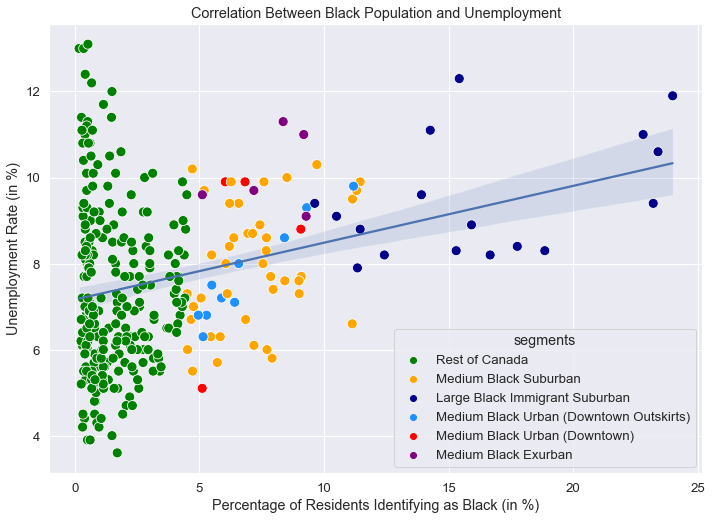

In [53]:
# sns.scatterplot(x="ethnic_percent_black", y="employment_unemployment_rate", data=main_df,hue='cluster')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
sns.regplot(x="ethnic_percent_black2", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.scatterplot(x="ethnic_percent_black2", y="employment_unemployment_rate", data=scatter_df ,hue='segments',s=100, palette=['green','orange','darkblue','dodgerblue','red','purple'])#hue='cluster')
ax.set(xlabel='Percentage of Residents Identifying as Black (in %)', ylabel='Unemployment Rate (in %)',title='Correlation Between Black Population and Unemployment')
plt.show()

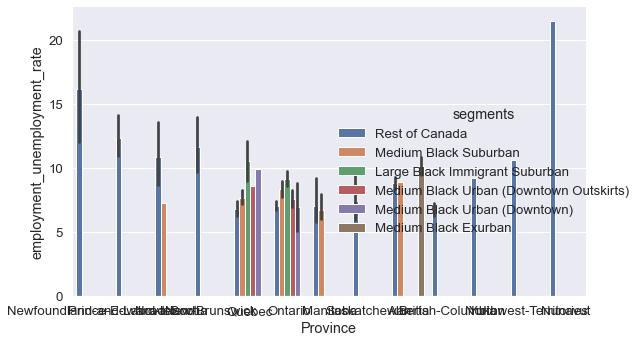

In [63]:
sns.set(rc={'figure.figsize':(30,30)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
sns.catplot(x='Province', y='employment_unemployment_rate', hue='segments', data=main_df, kind='bar')
# plt.xticks(plt.xticks()[0], main_df.Province, rotation=90)
plt.tight_layout()

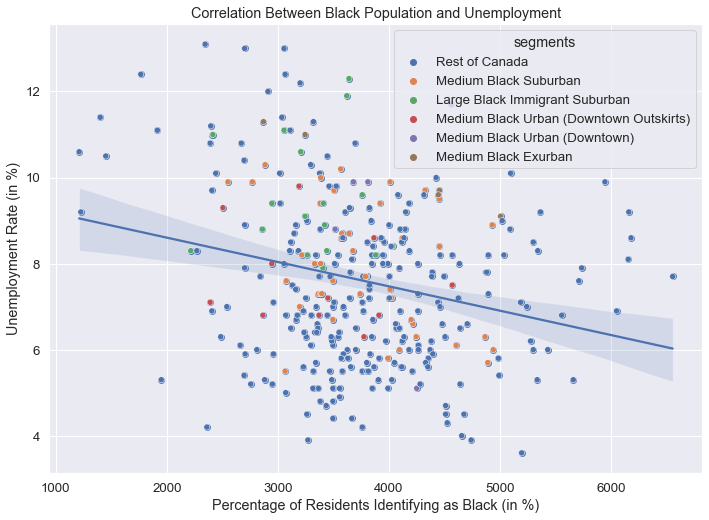

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
sns.regplot(x="employment_type_3_health_occupations", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.scatterplot(x="employment_type_3_health_occupations", y="employment_unemployment_rate", data=scatter_df ,hue='segments')#hue='cluster')
ax.set(xlabel='Percentage of Residents Identifying as Black (in %)', ylabel='Unemployment Rate (in %)',title='Correlation Between Black Population and Unemployment')
plt.show()

In [35]:
main_df['employment_type_percent_0_management_occupations2']=main_df['employment_type_percent_0_management_occupations']*100

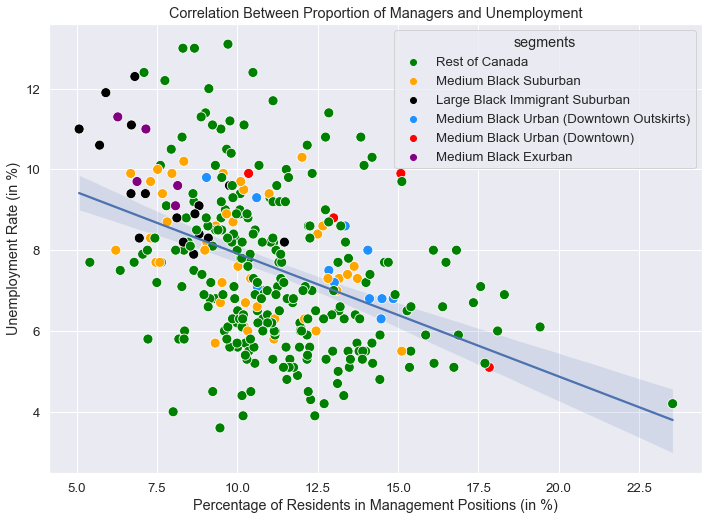

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
sns.color_palette("Paired")
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
sns.regplot(x="employment_type_percent_0_management_occupations2", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.scatterplot(x="employment_type_percent_0_management_occupations2", y="employment_unemployment_rate", data=scatter_df ,hue='segments',s=100,palette=['green','orange','black','dodgerblue','red','purple'])#hue='cluster')
ax.set(xlabel='Percentage of Residents in Management Positions (in %)', ylabel='Unemployment Rate (in %)',title='Correlation Between Proportion of Managers and Unemployment')
plt.show()

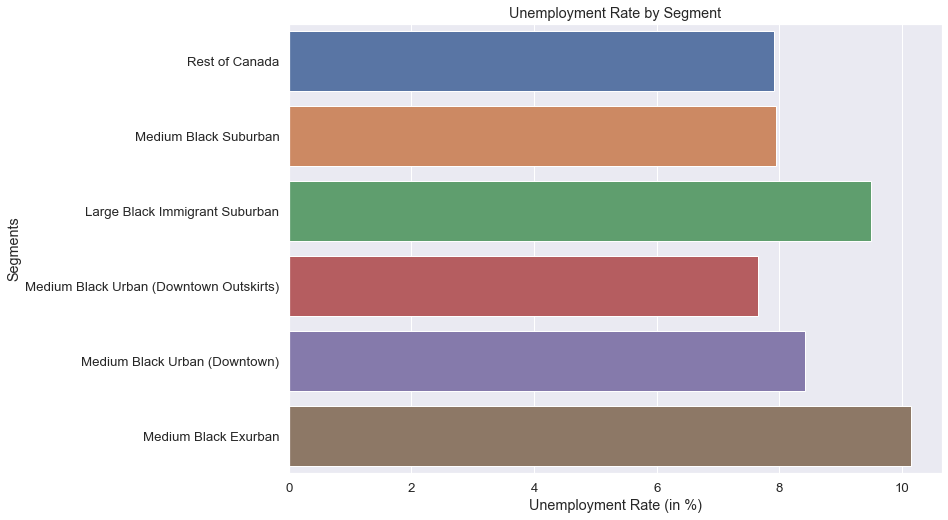

In [12]:
# sns.scatterplot(x="ethnic_percent_black", y="employment_unemployment_rate", data=main_df,hue='cluster')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
main_df['education_subject_percent_business_management_and_public_administration2']=main_df['education_subject_percent_business_management_and_public_administration']*100
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
# sns.regplot(x="immigrant_category_percent_immigrants", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.barplot(y='segments',x= 'employment_unemployment_rate', data=main_df, ci=False)
ax.set(ylabel='Segments', xlabel='Unemployment Rate (in %)',title='Unemployment Rate by Segment')

plt.show()

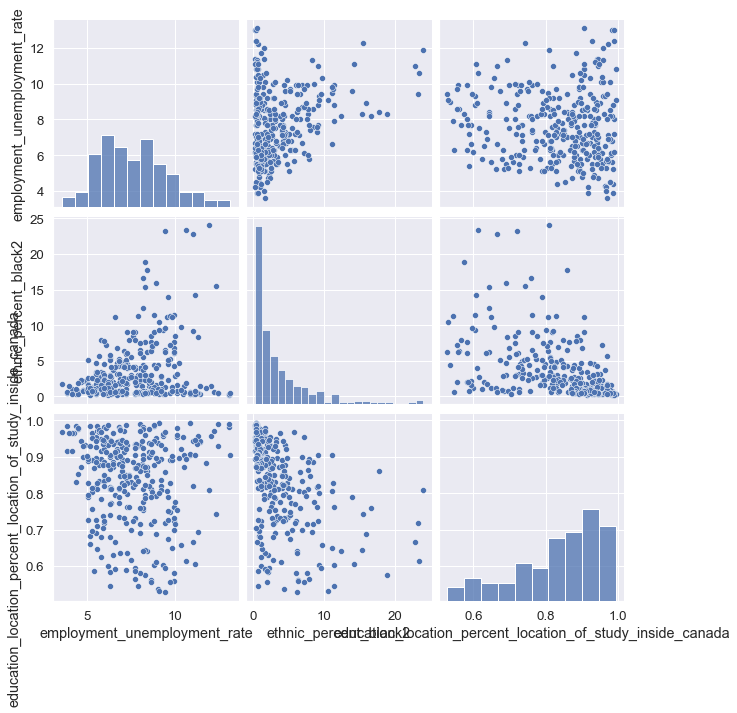

In [13]:
sns.pairplot(scatter_df[["employment_unemployment_rate","ethnic_percent_black2","education_location_percent_location_of_study_inside_canada"]], height=3)

In [15]:
main_df[main_df.employment_unemployment_rate>=13.5]

,Electoral_District_Number,District_Name_x,Province,2015_Bloc-Québécois_Votes,2015_Conservative_Votes,2015_Green-Party_Votes,2015_Liberal_Votes,2015_NDP-New-Democratic-Party_Votes,2015_Other_Votes,2015_Vote_Total,2015_Position_1,2015_Position_2,2015_Position_3,2015_Position_4,2015_Position_5,2015_Position_6,2015_Number_of_Polling_Stations,2015_Number_of_Electors,2015_Bloc-Québécois,2015_Conservative,2015_Green-Party,2015_Liberal,2015_NDP-New-Democratic-Party,2015_Other,2015_Percent_Riding_Votes_Liberal,2015_Percent_Riding_Votes_Bloc-Québécois,2015_Percent_Riding_Votes_Conservative,2015_Percent_Riding_Votes_Green-Party,2015_Percent_Riding_Votes_NDP-New-Democratic-Party,2015_Percent_Riding_Votes_Other,2015_Voter_Participation,2019_Bloc-Québécois_Votes,2019_Conservative_Votes,2019_Green-Party_Votes,2019_Liberal_Votes,2019_NDP-New-Democratic-Party_Votes,2019_Other_Votes,2019_Vote_Total,2019_Position_1,2019_Position_2,2019_Position_3,2019_Position_4,2019_Position_5,2019_Position_6,2019_Number_of_Polling_Stations,2019_Number_of_Electors,2019_Bloc-Québécois,2019_Conservative,2019_Green-Party,2019_Liberal,2019_NDP-New-Democratic-Party,2019_Other,2019_Percent_Riding_Votes_Liberal,2019_Percent_Riding_Votes_Bloc-Québécois,2019_Percent_Riding_Votes_Conservative,2019_Percent_Riding_Votes_Green-Party,2019_Percent_Riding_Votes_NDP-New-Democratic-Party,2019_Percent_Riding_Votes_Other,2019_Voter_Participation,2015-2019_Absolute_Change_Bloc-Québécois_Votes,2015-2019_EOE_Percent_Change_Bloc-Québécois_Votes,2015-2019_Absolute_Change_Conservative_Votes,2015-2019_EOE_Percent_Change_Conservative_Votes,2015-2019_Absolute_Change_Green-Party_Votes,2015-2019_EOE_Percent_Change_Green-Party_Votes,2015-2019_Absolute_Change_Liberal_Votes,2015-2019_EOE_Percent_Change_Liberal_Votes,2015-2019_Absolute_Change_NDP-New-Democratic-Party_Votes,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party_Votes,2015-2019_Absolute_Change_Other_Votes,2015-2019_EOE_Percent_Change_Other_Votes,2015-2019_Absolute_Change_Vote_Total,2015-2019_EOE_Percent_Change_Vote_Total,2015-2019_Absolute_Change_Number_of_Polling_Stations,2015-2019_EOE_Percent_Change_Number_of_Polling_Stations,2015-2019_Absolute_Change_Number_of_Electors,2015-2019_EOE_Percent_Change_Number_of_Electors,2015-2019_Absolute_Change_Bloc-Québécois,2015-2019_EOE_Percent_Change_Bloc-Québécois,2015-2019_Absolute_Change_Conservative,2015-2019_EOE_Percent_Change_Conservative,2015-2019_Absolute_Change_Green-Party,2015-2019_EOE_Percent_Change_Green-Party,2015-2019_Absolute_Change_Liberal,2015-2019_EOE_Percent_Change_Liberal,2015-2019_Absolute_Change_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Other,2015-2019_EOE_Percent_Change_Other,2015-2019_Absolute_Change_Percent_Riding_Votes_Liberal,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Liberal,2015-2019_Absolute_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_Absolute_Change_Percent_Riding_Votes_Conservative,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Conservative,2015-2019_Absolute_Change_Percent_Riding_Votes_Green-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Green-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_Other,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Other,2015-2019_Absolute_Change_Voter_Participation,2015-2019_EOE_Percent_Change_Voter_Participation,employment_type_percent_0_management_occupations,employment_type_percent_1_business_finance_and_administration_occupations,employment_type_percent_2_natural_and_applied_sciences_and_related_occupations,employment_type_percent_3_health_occupations,employment_type_percent_4_occupations_in_education_law_and_social_community_and_government_services,employment_type_percent_5_occupations_in_art_culture_recreation_and_sport,e